# Eigenface

In this document, We'll try Eigen Faces for some image data using OpenCV and Numpy. We'll also use [facelm module](https://github.com/koojagyum/pyqt5glfw/tree/master/facelm) to get facial landmarks and align faces. For the facial image dataset, celeb_new data, which I personally used to find a way to get facial shapes, will be used. This whole process is following a great [Learn OpenCV's article](https://www.learnopencv.com/eigenface-using-opencv-c-python/) for Principal Components Analysis.

## Dataset

celeb_new is developed based on the dataset from 'Face shape classification using Inception v3'. The author claimed the dataset will not be used in commercial purposes. So I can't make it public. Instead, you can specify the image directory and the codes following in this document will process with the images in that directory. If you're  interested in the original dataset, ask for the author of the paper and reference https://github.com/adonistio/inception-face-shape-classifier.

In [ ]:
import os

# Put your directory containing facial image files.
DATASET_DIR = '~/Workspace/Resource/face_shapes/celebs3_new/heart'
DATASET_DIR = os.path.expanduser(DATASET_DIR)

## Image crop

```crop(image)``` in ```facelm.crop``` returns a list of cropped faces from image. We'll process the image directory to get a cropped image list.

In [ ]:
from facelm.crop import process_crop

# Put directory path for saving cropped image files.
CROPPEDIMG_DIR = './image/cropped'

process_crop(DATASET_DIR, CROPPEDIMG_DIR)

## Image resize

We need to resize image with same resolution. The target size is 100&times;144.

In [ ]:
import cv2
import glob
import os

from facelm.crop import filename_of
from facelm.crop import mkdirp

# Put directory path for saving resized image files.
RESIZEIMG_DIR = './image/resized'
IMGSIZE = (100, 144)

def process_resize(indir, outdir, size):
    mkdirp(outdir)

    imgfiles = glob.glob(os.path.join(indir, '*g'))
    for f in imgfiles:
        filename = filename_of(f)
        # print('Processing {} ...'.format(filename))

        img = cv2.imread(f)
        if img is None:
            print('Error: Failed to read {} as image'.format(filename))
            continue

        resized = cv2.resize(img, size)

        outpath = os.path.join(outdir, filename)
        cv2.imwrite(outpath, resized)

    print('Done!')

process_resize(CROPPEDIMG_DIR, RESIZEIMG_DIR, IMGSIZE)

## Create a data matrix

We need to create a data matrix consisting image data of N rows of 100&times;144&times;3(RGB)&equals;43200 columns. This data matrix will be passed to the PCA method of OpenCV.

In [1]:
import cv2
import glob
import numpy as np
import os

# Put directory path for saving resized image files.
RESIZEIMG_DIR = './image/resized'
IMGSIZE = (100, 144)

def load_data(indir, column_size):
    imgfiles = glob.glob(os.path.join(indir, '*g'))
    data_list = []
    for f in imgfiles:
        img = cv2.imread(f)
        if img is None:
            print('Error: Failed to read {} as image'.format(filename_of(f)))
            continue
    
        data_list.append(img.reshape(column_size))

    return np.array(data_list, dtype=np.float32)

column_size = IMGSIZE[0] * IMGSIZE[1] * 3
data = load_data(RESIZEIMG_DIR, column_size)
print(data.shape)

(136, 43200)


## Calculate PCA

The main part is here.

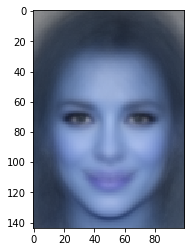

In [3]:
from matplotlib import pyplot as plt

NUM_EIGEN_FACES = 10

mean, eigenVectors = cv2.PCACompute(
    data,
    mean=None,
    maxComponents=NUM_EIGEN_FACES
)

plt.imshow(mean.astype(np.uint8).reshape((IMGSIZE[1], IMGSIZE[0], 3)))